In [47]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import json
import matplotlib.pyplot as plt

In [50]:

# Load user input data
with open('user.json', 'r') as f:
    user_data = json.load(f)

In [74]:

# Create label encoders
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()

# Create dataframes
for i in user_data:
    data = user_data[str(i)]["data"]
    result = user_data[str(i)]["result"]
    dataframe = pd.DataFrame(data, columns=["Name","Type 1", "Type 2", "Generation","legendary", "color","first_letter"])
    resultframe = pd.DataFrame(result, columns=["favorite"])

    # Generate numerical labels
    dataframe["Name"] = le1.fit_transform(dataframe["Name"])
    dataframe["Type 1"] = le2.fit_transform(dataframe["Type 1"])
    dataframe["Type 2"] = le3.fit_transform(dataframe["Type 2"])
    dataframe["Generation"] = le4.fit_transform(dataframe["Generation"])
    dataframe["legendary"] = le5.fit_transform(dataframe["legendary"])
    dataframe["color"] = le6.fit_transform(dataframe["color"])
    dataframe["first_letter"] = le7.fit_transform(dataframe["first_letter"])
    resultframe["favorite"] = le8.fit_transform(resultframe["favorite"])

    # Split data into training and testing sets
    train_dataset = dataframe.sample(frac=0.8, random_state=0)
    test_dataset = dataframe.drop(train_dataset.index)

    # Split labels into training and testing sets
    train_labels = resultframe.sample(frac=0.8, random_state=0)
    test_labels = resultframe.drop(train_labels.index)

    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(7,)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_dataset, train_labels, validation_data=(test_dataset, test_labels), epochs=5)


Epoch 1/5
2/2 [==============================] - 1s 125ms/step - loss: 1.1147 - accuracy: 0.5227 - val_loss: 1.1075 - val_accuracy: 0.4444
Epoch 2/5
2/2 [==============================] - 0s 25ms/step - loss: 1.0021 - accuracy: 0.4773 - val_loss: 1.1309 - val_accuracy: 0.3333
Epoch 3/5
2/2 [==============================] - 0s 30ms/step - loss: 0.8984 - accuracy: 0.4773 - val_loss: 1.1465 - val_accuracy: 0.3333
Epoch 4/5
2/2 [==============================] - 0s 31ms/step - loss: 0.8689 - accuracy: 0.4318 - val_loss: 1.1628 - val_accuracy: 0.3333
Epoch 5/5
2/2 [==============================] - 0s 30ms/step - loss: 0.8505 - accuracy: 0.4091 - val_loss: 1.1574 - val_accuracy: 0.3333
Epoch 1/5
1/1 [==============================] - 1s 759ms/step - loss: 1.0652 - accuracy: 0.4500 - val_loss: 1.2369 - val_accuracy: 0.2500
Epoch 2/5
1/1 [==============================] - 0s 32ms/step - loss: 1.0173 - accuracy: 0.4500 - val_loss: 1.1564 - val_accuracy: 0.2500
Epoch 3/5
1/1 [=================

In [77]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [53]:
# Evaluate model
test_loss, test_acc = model.evaluate(train_data, train_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


1/1 [==============================] - 0s 236ms/step - loss: 0.6882 - accuracy: 1.0000
Test accuracy: 1.0
Test loss: 0.6881605982780457


KeyError: 'val_accuracy'

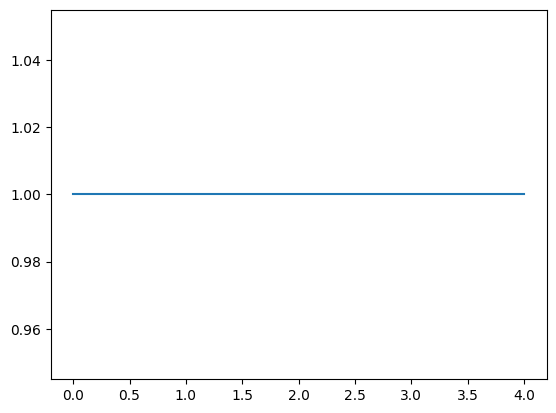

In [78]:
# Plot accuracy and loss over time
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()